In [ ]:
import pandas as pd


In [ ]:
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [ ]:
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
97,Recife,2019-01-01,153.04,983,4
73,Salvador,2019-01-01,8.39,1037,1
25,Aracaju,2018-01-01,34.66,1521,8
156,Salvador,2019-01-02,36.14,1037,3
89,Salvador,2019-01-01,17.46,1034,1


In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
df['LojaID'] = df['LojaID'].astype('object')

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Substituindo os valores nulos pela média
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)

In [ ]:
#Substituindo os valores nulos por zero
df['Vendas'].fillna(0, inplace=True)

In [ ]:
#Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [ ]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=['Vendas'], inplace=True)

In [ ]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how='all', inplace=True)

In [ ]:
#Criando a coluna de receita
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#Caso não tenha a coluna quantidade, para saber a quantidade
df['Receita/Vendas'] = df['Receita'] / df['Vendas']

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [ ]:
df['Receita'].max()

3544.0

In [ ]:
df['Receita'].min()

3.34

In [ ]:
#Qual loja vendeu mais ..top 3 das receitas
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [ ]:
#Qual loja vendeu menos ..top 4 das receitas
df.nsmallest(4, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0
92,Salvador,2019-01-01,4.57,1035,1,4.57,1.0


In [ ]:
#Agrupamento por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#Ordenando o conjunto de dados
df.sort_values('Receita', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


In [ ]:
#transformando a coluna de data em tipo inteiro
df['Data'] = pd.to_datetime(df['Data'])

In [ ]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [ ]:
#agrupamento por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#Criando uma nova coluna com o ano
df['Ano_Venda'] = df['Data'].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
80,Natal,2018-05-23,264.00,852,3,792.00,3.0,2018
66,Natal,2019-03-24,559.00,853,2,1118.00,2.0,2019
127,Recife,2019-03-02,39.56,982,8,316.48,8.0,2019
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019
10,Recife,2019-01-01,38.51,982,8,308.08,8.0,2019


In [ ]:
#Extraindo mes e o dia
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
18,Recife,2019-01-01,49.40,980,5,247.00,5.0,2019,1,1
137,Natal,2019-01-02,51.66,1036,3,154.98,3.0,2019,1,2
173,Natal,2019-01-02,31.77,1034,2,63.54,2.0,2019,1,2
193,Salvador,2019-01-02,3.97,1036,2,7.94,2.0,2019,1,2
156,Natal,2019-01-02,36.14,1037,3,108.42,3.0,2019,1,2


In [ ]:
#Retornando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Calculando a diferença de dias
df['diferença_dias'] = df['Data'] - df['Data'].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferença_dias
96,Salvador,2019-01-01,42.94,1034,3,128.82,3.0,2019,1,1,365 days
207,Natal,2019-01-02,46.70,1036,2,93.40,2.0,2019,1,2,366 days
109,Natal,2019-01-02,124.37,1035,1,124.37,1.0,2019,1,2,366 days
190,Natal,2019-01-02,78.78,1035,3,236.34,3.0,2019,1,2,366 days
183,Salvador,2019-01-02,120.23,1037,2,240.46,2.0,2019,1,2,366 days


In [ ]:
#Criando a coluna de trimestre / bimestre / semestre
df['semestre_venda'] = df['Data'].dt.quarter

In [ ]:
df.sample(5)


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferença_dias,semestre_venda
64,Recife,2019-01-01,89.32,983,2,178.64,2.0,2019,1,1,365 days,1
0,Recife,2019-01-01,162.61,981,1,162.61,1.0,2019,1,1,365 days,1
127,Salvador,2019-03-02,240.61,1035,3,721.83,3.0,2019,3,2,425 days,1
56,Salvador,2019-01-01,178.44,1035,3,535.32,3.0,2019,1,1,365 days,1
82,Natal,2019-03-07,868.00,854,3,2604.00,3.0,2019,3,7,430 days,1


In [ ]:
#Filtrando as vendas de 2019 do mes de março
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]


In [ ]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferença_dias,semestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


In [ ]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferença_dias,semestre_venda
2,Natal,2019-03-11,308.00,852,3,924.00,3.0,2019,3,11,434 days,1
119,Salvador,2019-03-02,136.37,1034,2,272.74,2.0,2019,3,2,425 days,1
32,Natal,2019-03-17,244.00,854,2,488.00,2.0,2019,3,17,440 days,1
133,Salvador,2019-03-02,153.71,1035,1,153.71,1.0,2019,3,2,425 days,1
132,Recife,2019-03-02,17.49,983,5,87.45,5.0,2019,3,2,425 days,1
7,Natal,2019-03-18,886.00,853,4,3544.00,4.0,2019,3,18,441 days,1
136,Fortaleza,2019-03-02,39.09,982,4,156.36,4.0,2019,3,2,425 days,1
130,Fortaleza,2019-03-02,12.36,983,4,49.44,4.0,2019,3,2,425 days,1
127,Salvador,2019-03-02,240.61,1035,3,721.83,3.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1


**Visualização de Dados**


In [ ]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

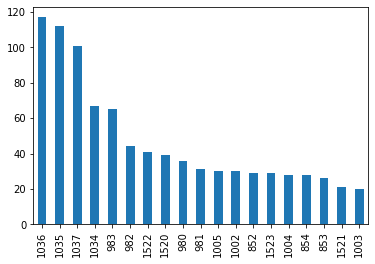

In [ ]:
#Gráfico de barras
df['LojaID'].value_counts(ascending=False).plot.bar()

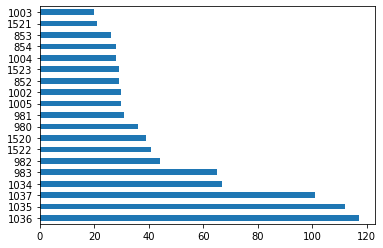

In [ ]:
#Gráfico de barras horizontais
df['LojaID'].value_counts().plot.barh()

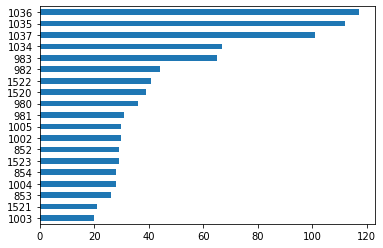

In [ ]:
#Gráfico de barras horizontais
df['LojaID'].value_counts(ascending=True).plot.barh();

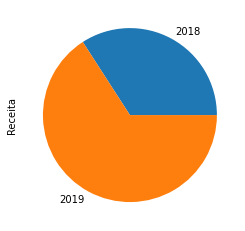

In [ ]:
#Gráfico de Pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();

In [ ]:
#Total vendas por cidade
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

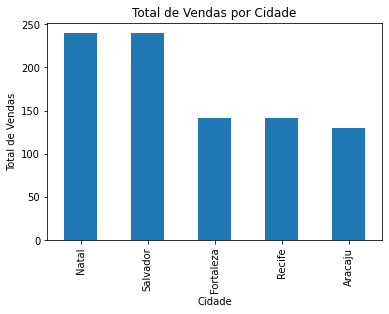

In [ ]:
#Adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total de Vendas por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas');


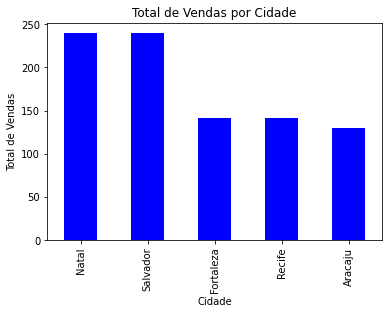

In [ ]:
#Alteração a cor
df['Cidade'].value_counts().plot.bar(title='Total de Vendas por Cidade', color='blue')
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas');


In [ ]:
#Alterando o estilo
plt.style.use('ggplot')

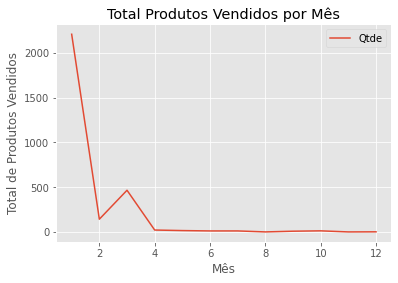

In [ ]:
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title = 'Total Produtos Vendidos por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Produtos Vendidos');
plt.legend();

In [ ]:
df.groupby(df['mes_venda'])['Qtde'].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
#Selecionando apenas as vendas de um ano - foi criado a variavel df_2019
df_2019 = df[df['Ano_Venda'] == 2019]

In [ ]:
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

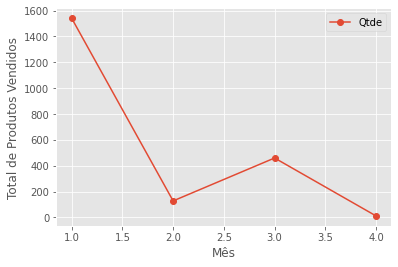

In [ ]:
#Total de produtos vendidos por mês
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'o')
plt.xlabel('Mês')
plt.ylabel('Total de Produtos Vendidos');
plt.legend();

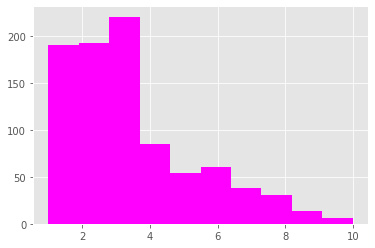

In [ ]:
#Histograma
plt.hist(df['Qtde'], color = 'Magenta');

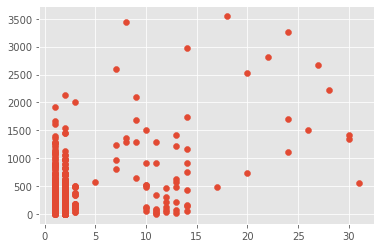

In [ ]:
plt.scatter(x= df_2019['dia_venda'], y= df_2019['Receita']);

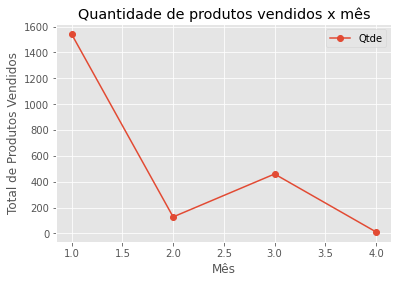

In [ ]:
#salvando em png
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'o')
plt.title('Quantidade de produtos vendidos x mês')
plt.xlabel('Mês')
plt.ylabel('Total de Produtos Vendidos');
plt.legend()
plt.savefig('Gráfico QTDE x MÊS.png')